In [16]:
from tensorflow.keras.models import load_model
###### AE MODEL LOAD ######
#ae_wo_classifier = load_model('model/AE_model/KERAS_check_best_model.h5')
#ae_wo_classifier_pruned = load_model('model/AE_model/KERAS_check_pruned_best_model.h5')
ae_w_classifier = load_model('model/AE_model/KERAS_check_best_model_classifier.h5')
ae_w_classifier_pruned = load_model('model/AE_model/KERAS_check_pruned_best_model_classifier.h5')

###### VAE MODEL LOAD ######
#vae_wo_classifier = load_model('model/VAE_model/KERAS_check_best_model.h5',custom_objects={'lamba_function': lamba_function})
#vae_wo_classifier_pruned = keras.models.load_model('model/VAE_model/KERAS_check_pruned_best_model.h5')
#vae_w_classifier = keras.models.load_model('model/VAE_model/KERAS_check_best_model_classifier.h5')
#vae_w_classifier_pruned = keras.models.load_model('model/VAE_model/KERAS_check_pruned_best_model_classifier.h5')


## Check sparsity
Make a quick check that the model was indeed trained sparse. We'll just make a histogram of the weights of the 1st layer, and hopefully observe a large peak in the bin containing '0'. Note logarithmic y axis.

% of zeros = 0.75


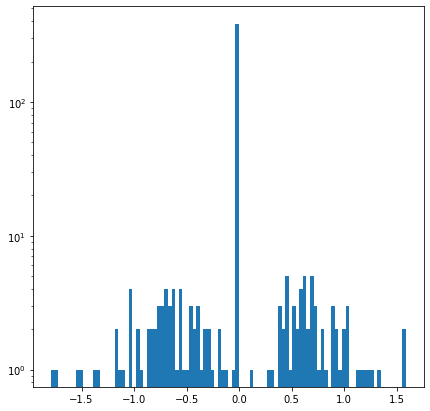

In [17]:
import numpy as np
from matplotlib import pyplot as plt

w = ae_w_classifier_pruned.layers[2].weights[0].numpy()
h, b = np.histogram(w, bins=100)
plt.figure(figsize=(7,7))
plt.bar(b[:-1], h, width=b[1]-b[0])
plt.semilogy()
print('% of zeros = {}'.format(np.sum(w==0)/np.size(w)))

In [ ]:
import MNIST_dataset as mnist
size_final = 10
data_zoom = mnist.MNISTData(size_final=size_final, color_depth=5)
"""
import plotting
from plotting import makeRoc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import numpy as np
model = load_model('model/AE_model/KERAS_check_model_w_classifier.h5')
#model_pruned =load_model('model/AE_model/KERAS_check_pruned_model_w_classifier.h5')

y_test = data_zoom.y_test

y_ref = model.predict(data_zoom.x_test)
#y_prune = ae_wo_classifier.predict(data_zoom.x_test)
#print("Accuracy unpruned: {}".format(accuracy_score(np.argmax(y_test.reshape(10000,10), axis=1), np.argmax(y_ref.reshape((10000,10)), axis=1))))
#print("Accuracy pruned:   {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_prune, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = makeRoc(y_test, y_ref)
plt.gca().set_prop_cycle(None) # reset the colors
_ = plotting.makeRoc(y_test, y_prune, linestyle='--')

from matplotlib.lines import Line2D
lines = [Line2D([0], [0], ls='-'),
         Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend
leg = Legend(ax, lines, labels=['unpruned', 'pruned'],
            loc='lower right', frameon=False)
ax.add_artist(leg)"""

# Make an hls4ml config & model

In [ ]:
import plotting
import hls4ml
config = hls4ml.utils.config_from_keras_model(ae_wo_classifier, granularity='model')
print("-----------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(ae_wo_classifier,
                                                       hls_config=config,
                                                       output_dir='model/AE_model/hls4ml_prj',
                                                       part='xc250-figd2104-2L-e')
                                                       #part='xcvu9p-flgc2104aaz')


In [ ]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

# Compile

In [ ]:
hls_model.compile()

# Build

In [ ]:
hls_model.build(csim=False)